# Annualized Return Pcnt


This work is my unsuccesful attempt to treat `Annualized Return Pcnt` data like percents.

After hours of investigation, hunting errors in my code, trying this and that I have found that:
- Usage in C2score: `( Annualized Return Pcnt / 100 )` is misleading.
- Data are not in percents. Values like 40, 50, 60 are not 40%, 50%, 60% but  4000%, 5000%, 6000% actually.
- Data are calculated for systems 2, 3, 4, ... days old and extrapolated to the year timeframe. The results are values like 274803 or 307726 which actually means 27480300% and 30772600%.
- Once calculated, those data are a part of the historical statistic database. It is a systematic error. So it is not possible to treat systems having returns like 30772600% as outliers and exclude them from calculations entirely.
- If Collective2 `Annualized Return Pcnt` is investigated, it must be done together with Age to exclude the absurd numbers shown above. 

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")
options(repr.plot.width=14, repr.plot.height=8)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7765      256061     -1.0000     -0.1574      0.08901524682.5524      0.4885       1e+0937688082.1758 


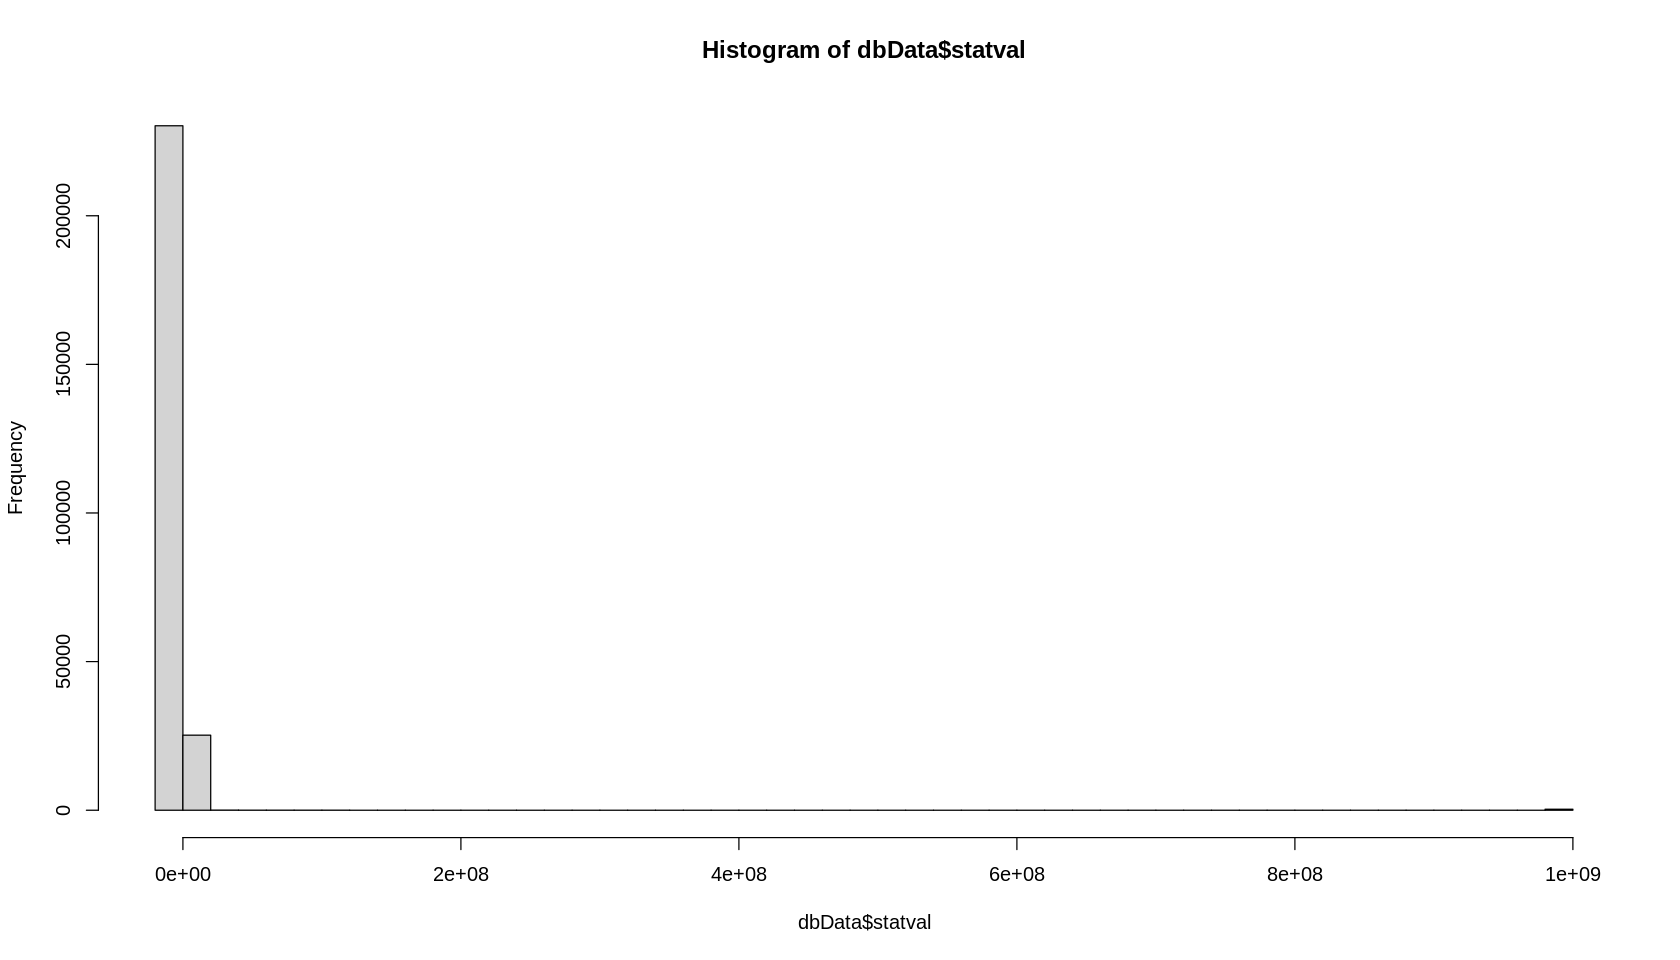

In [2]:
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval from historical_stats_modern where statname='cARdefault'")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1821        6020     10.0023     14.2508     22.4636     31.1550     41.0940     99.9719     22.2396 


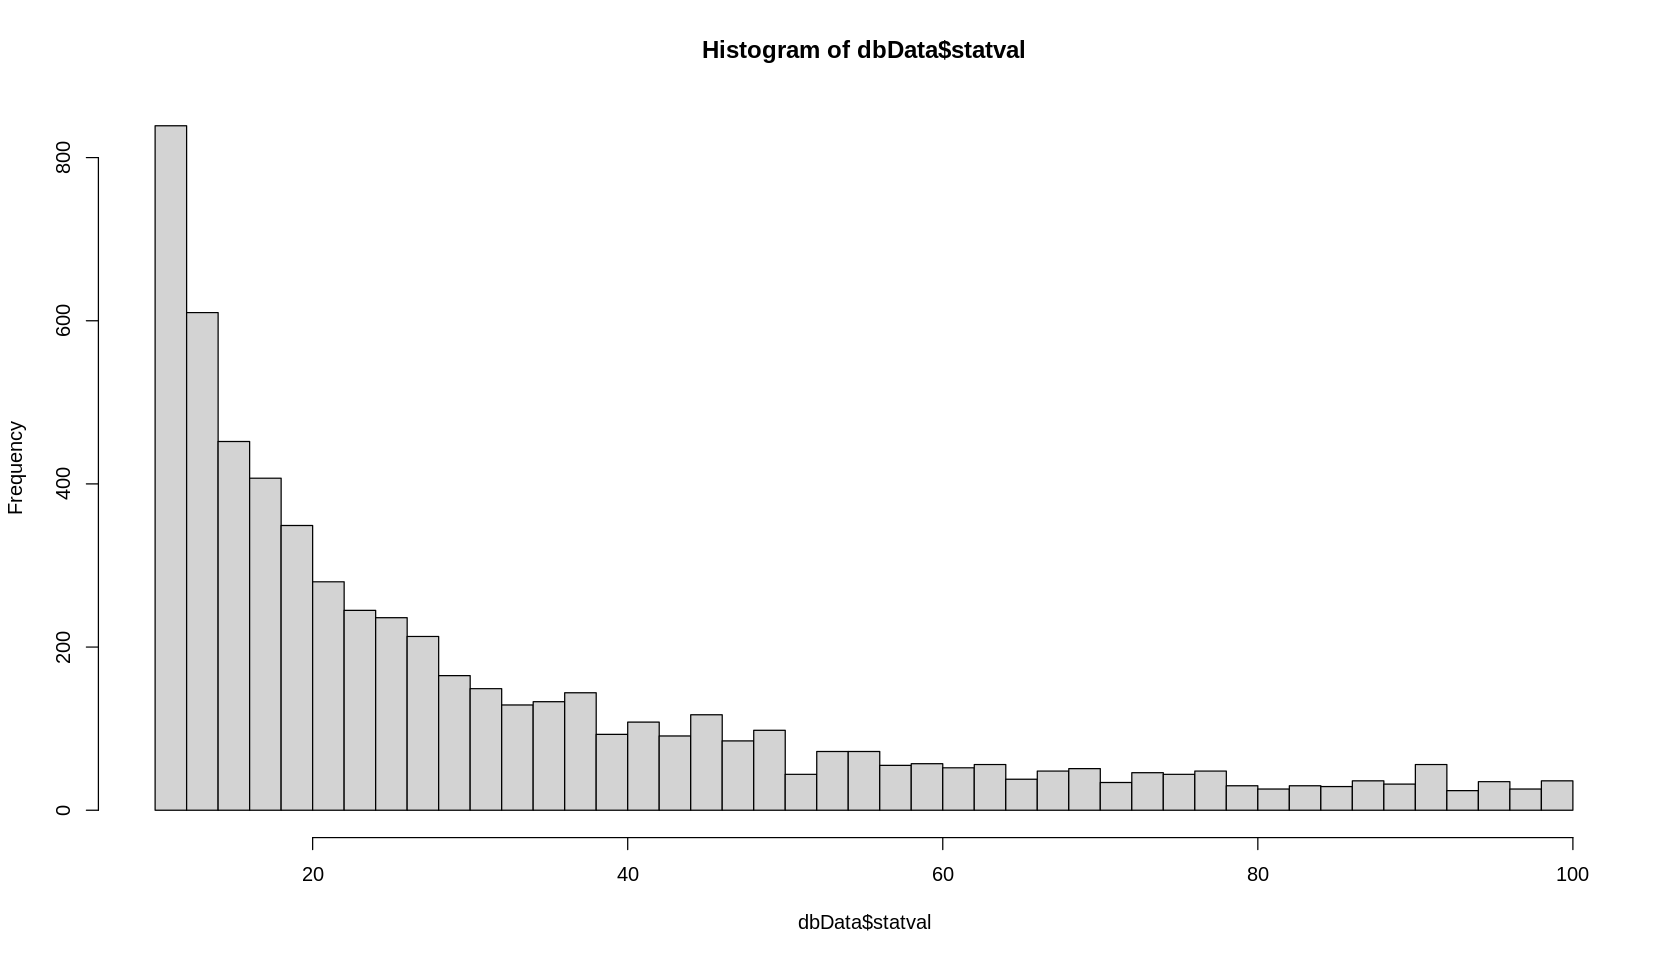

In [3]:
# Let's try to find reasonable data. 
# Ann return between 10 and 100%
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval
            from historical_stats_modern where statname='cARdefault' 
            and statval > 10 and statval <= 100")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         975        1994     10.0023     13.8659     21.6168     30.4093     39.9338     99.9664     21.9313 


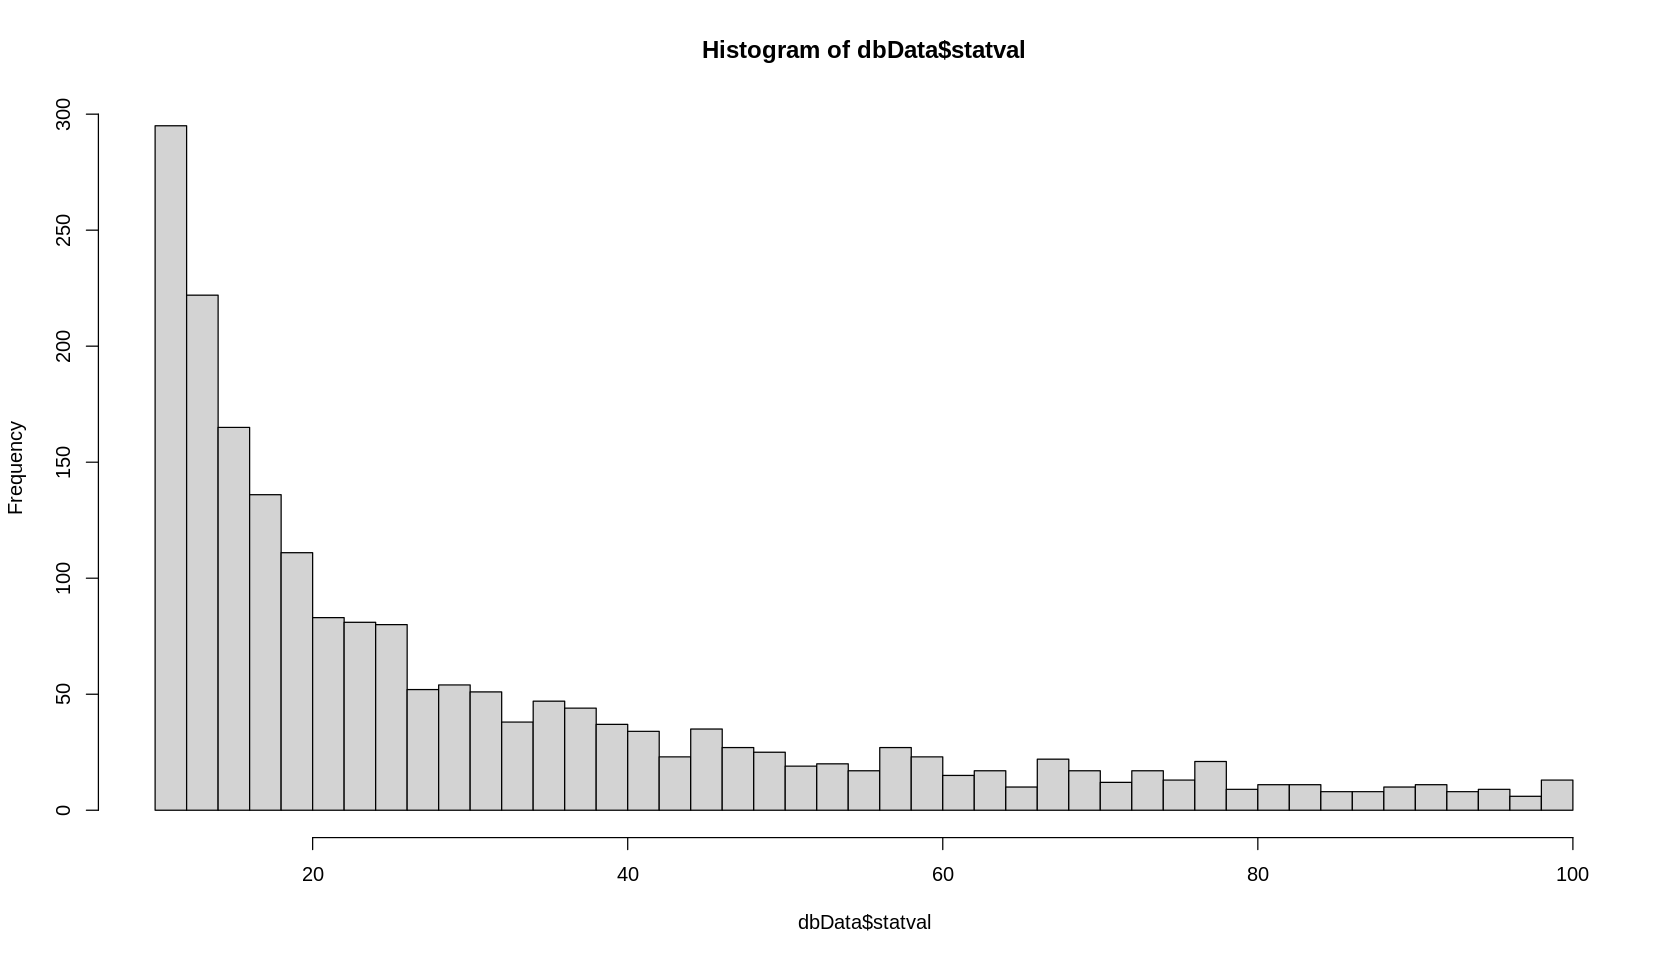

In [4]:
# Join it with our cleaned data
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleaned eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where statname='cARdefault' and statval > 10 and statval <= 100"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         975        1994     10.0023     13.8659     21.6168     30.4093     39.9338     99.9664     21.9313 



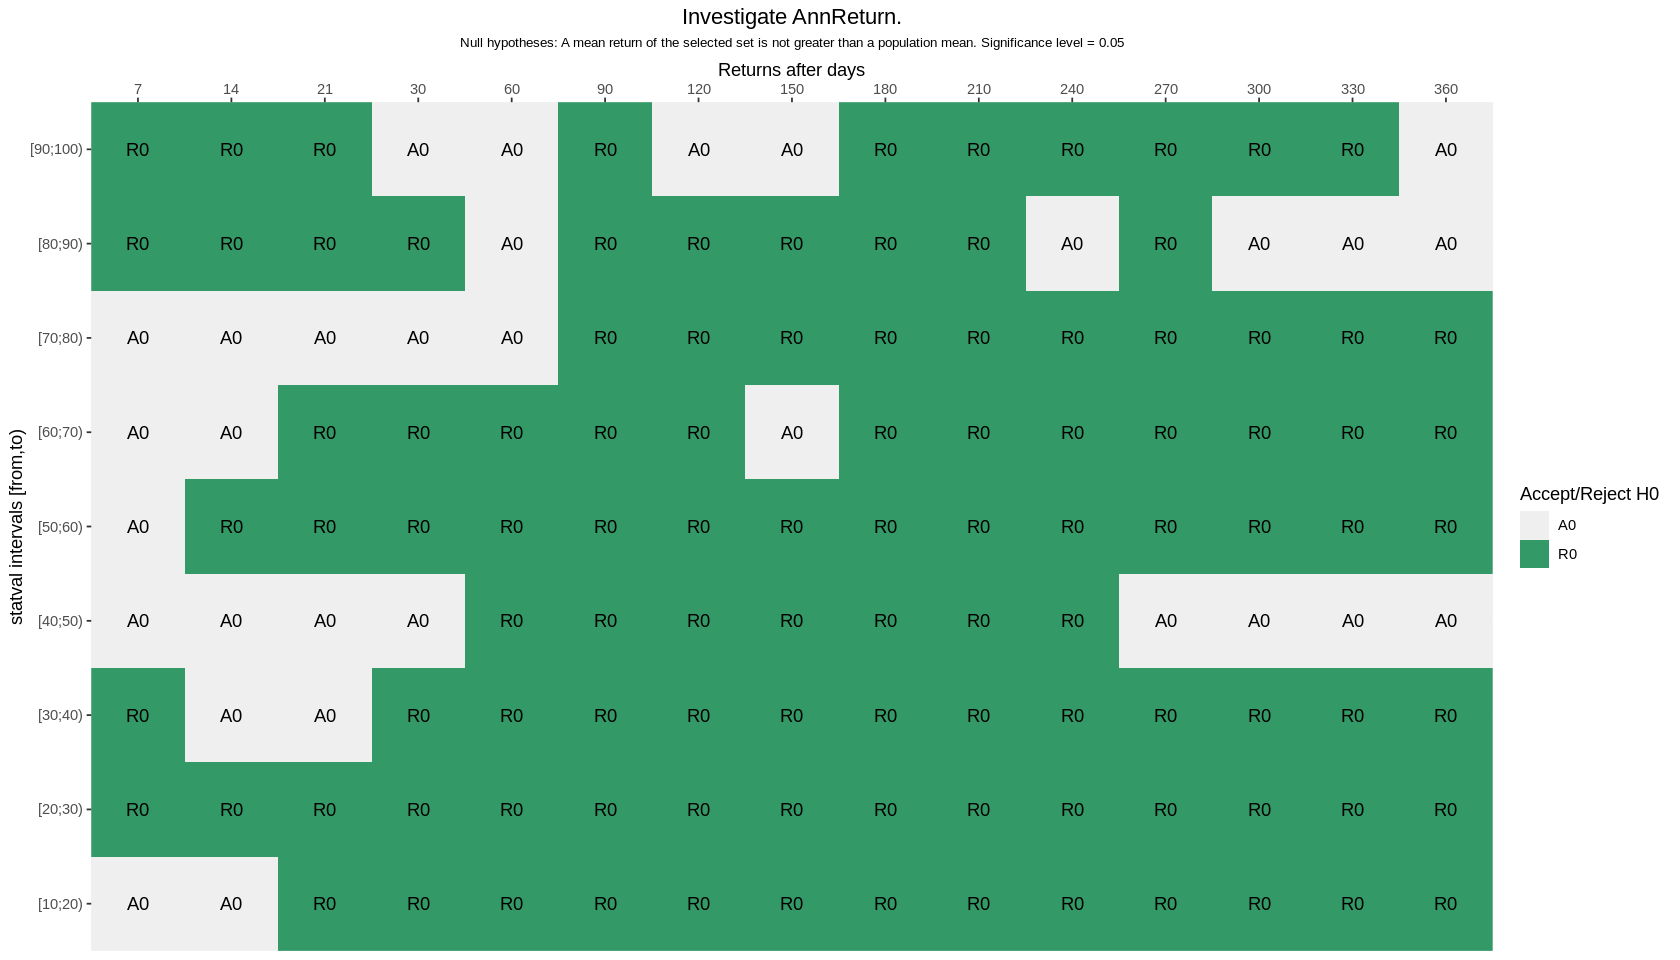


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90 <= statval < 100,44,39,37,36,24,19,16,13,9,9,7,7,6,5,3
80 <= statval < 90,47,41,39,34,22,17,11,9,8,7,7,6,5,3,3
70 <= statval < 80,65,57,53,46,29,23,18,15,14,11,11,10,9,8,7
60 <= statval < 70,77,73,69,59,39,31,22,14,11,9,9,8,7,4,4
50 <= statval < 60,99,91,82,71,50,39,32,25,23,21,20,20,17,14,11
40 <= statval < 50,132,118,104,85,56,41,34,29,25,21,20,18,12,10,6
30 <= statval < 40,201,173,147,120,80,66,44,32,27,23,22,19,15,14,13
20 <= statval < 30,328,302,267,235,179,132,108,88,77,68,65,60,50,42,35
10 <= statval < 20,871,802,746,662,501,384,316,269,235,207,193,166,143,125,108




Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90 <= statval < 100,42,37,35,34,24,19,16,13,9,9,7,7,6,5,3
80 <= statval < 90,47,41,39,34,22,17,11,9,8,7,7,6,5,3,3
70 <= statval < 80,62,55,51,44,27,22,17,14,13,11,11,10,9,8,7
60 <= statval < 70,73,70,66,56,36,28,20,13,10,8,8,7,6,4,4
50 <= statval < 60,94,86,78,68,47,37,30,23,21,19,18,18,16,14,11
40 <= statval < 50,126,112,98,79,52,39,33,28,25,21,20,18,12,10,6
30 <= statval < 40,175,152,128,103,71,59,42,30,25,21,20,17,13,12,11
20 <= statval < 30,260,237,207,180,131,97,79,64,56,51,48,43,39,31,27
10 <= statval < 20,558,505,466,401,295,222,180,147,130,111,102,95,80,67,56


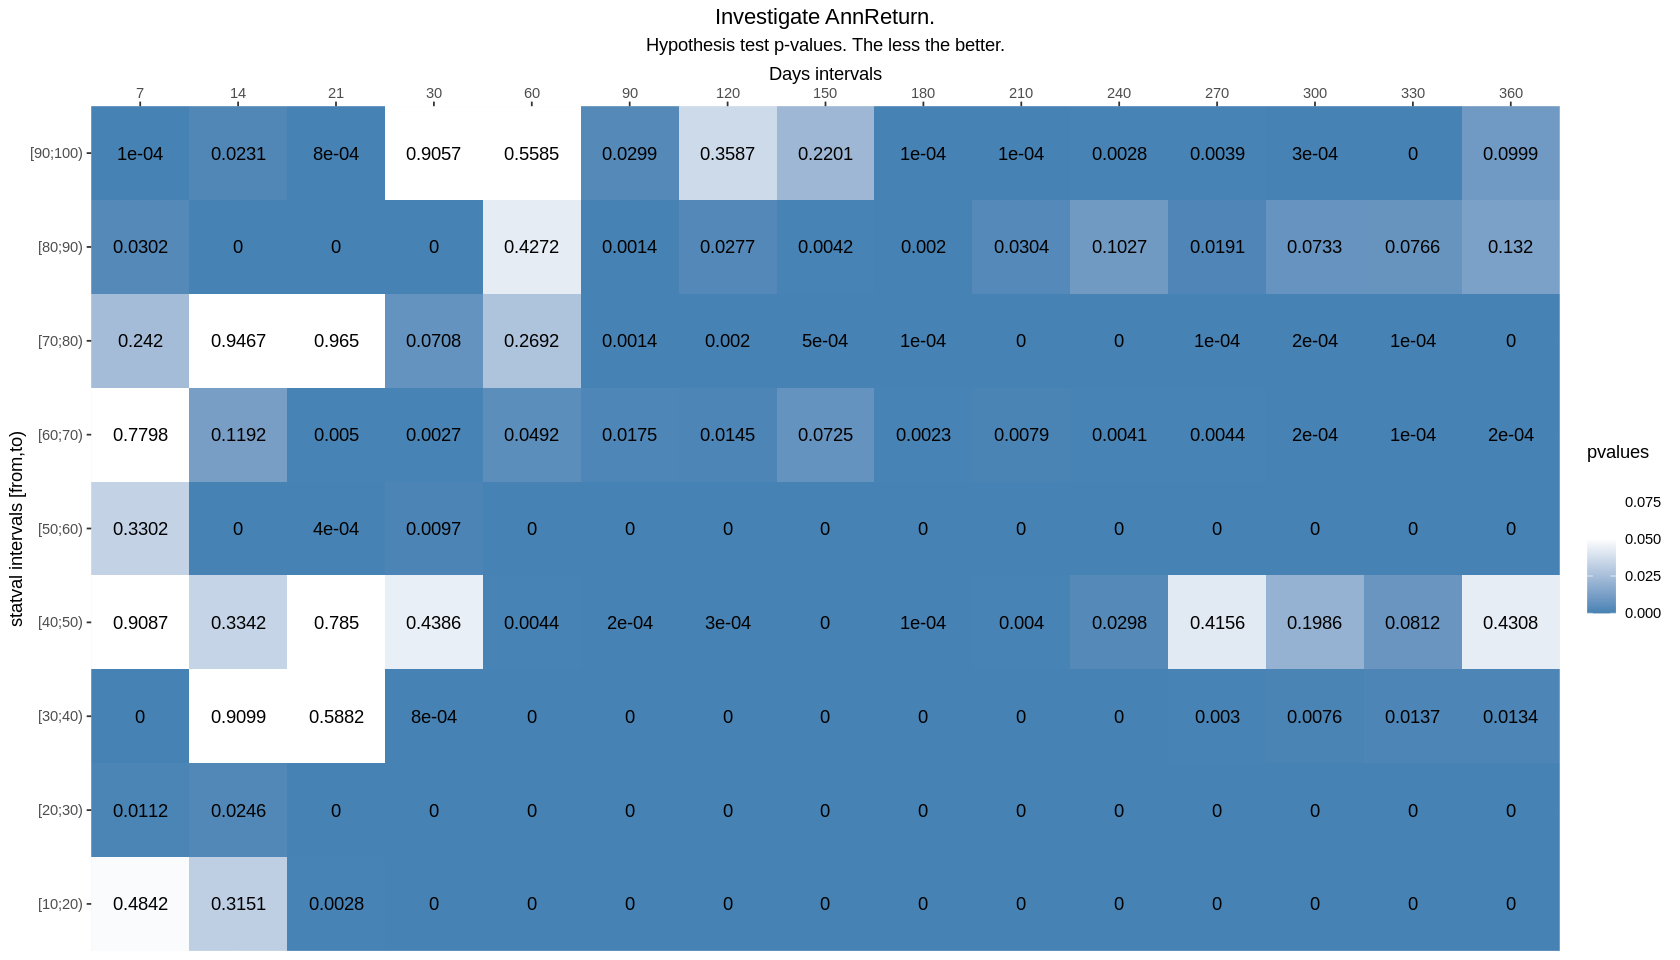

In [5]:
experiment = list(
  name = "Annualized Return Pcnt",
  description = "Investigate AnnReturn.",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 10, to = 100, by = 10),
  comparisonOperator = `>`)

result = makeExperiment(experiment)
showObservationsCounts(experiment, result) 
showSystemsCounts(experiment, result) 

### It is strange. It doesn't work.

Let's try to add Age.

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          23          50     10.0465     11.0496     13.0091     15.3763     17.5214     50.9080      7.2492 


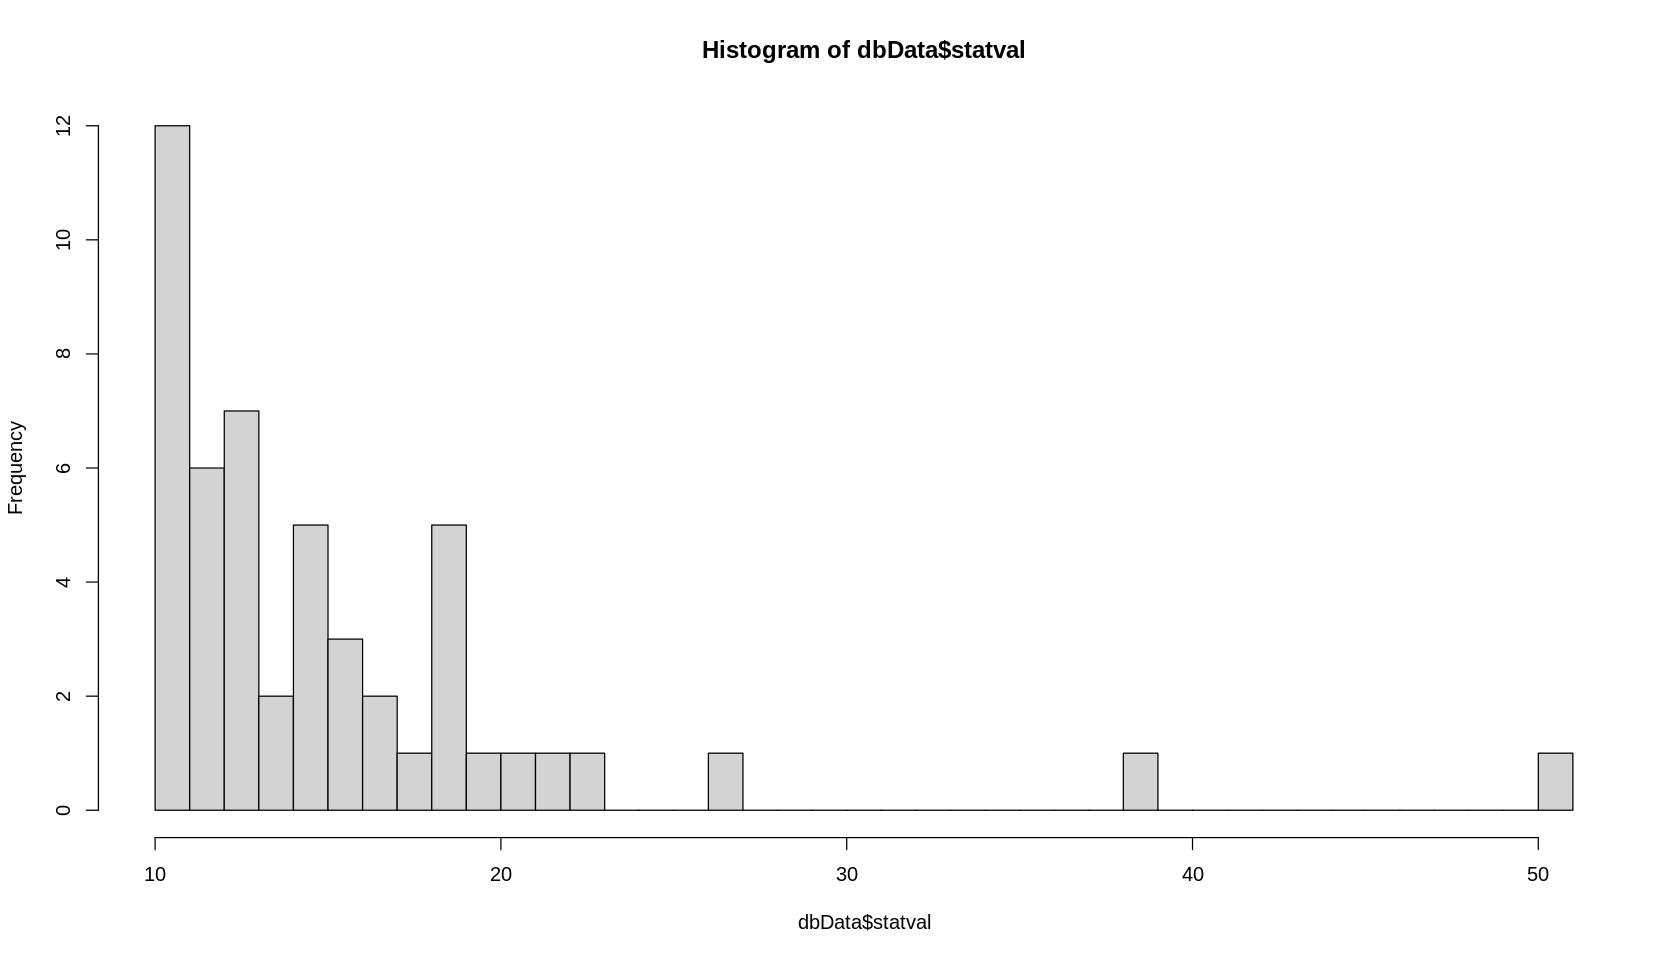

In [6]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleaned eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    Age > 90 and
    statname='cARdefault' and statval > 10 and statval <= 100"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

### Even stranger...

Oh my! Is it really in percents?

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1251       31088      0.1001      0.1945      0.3136      0.3729      0.5030      1.0000      0.2222 


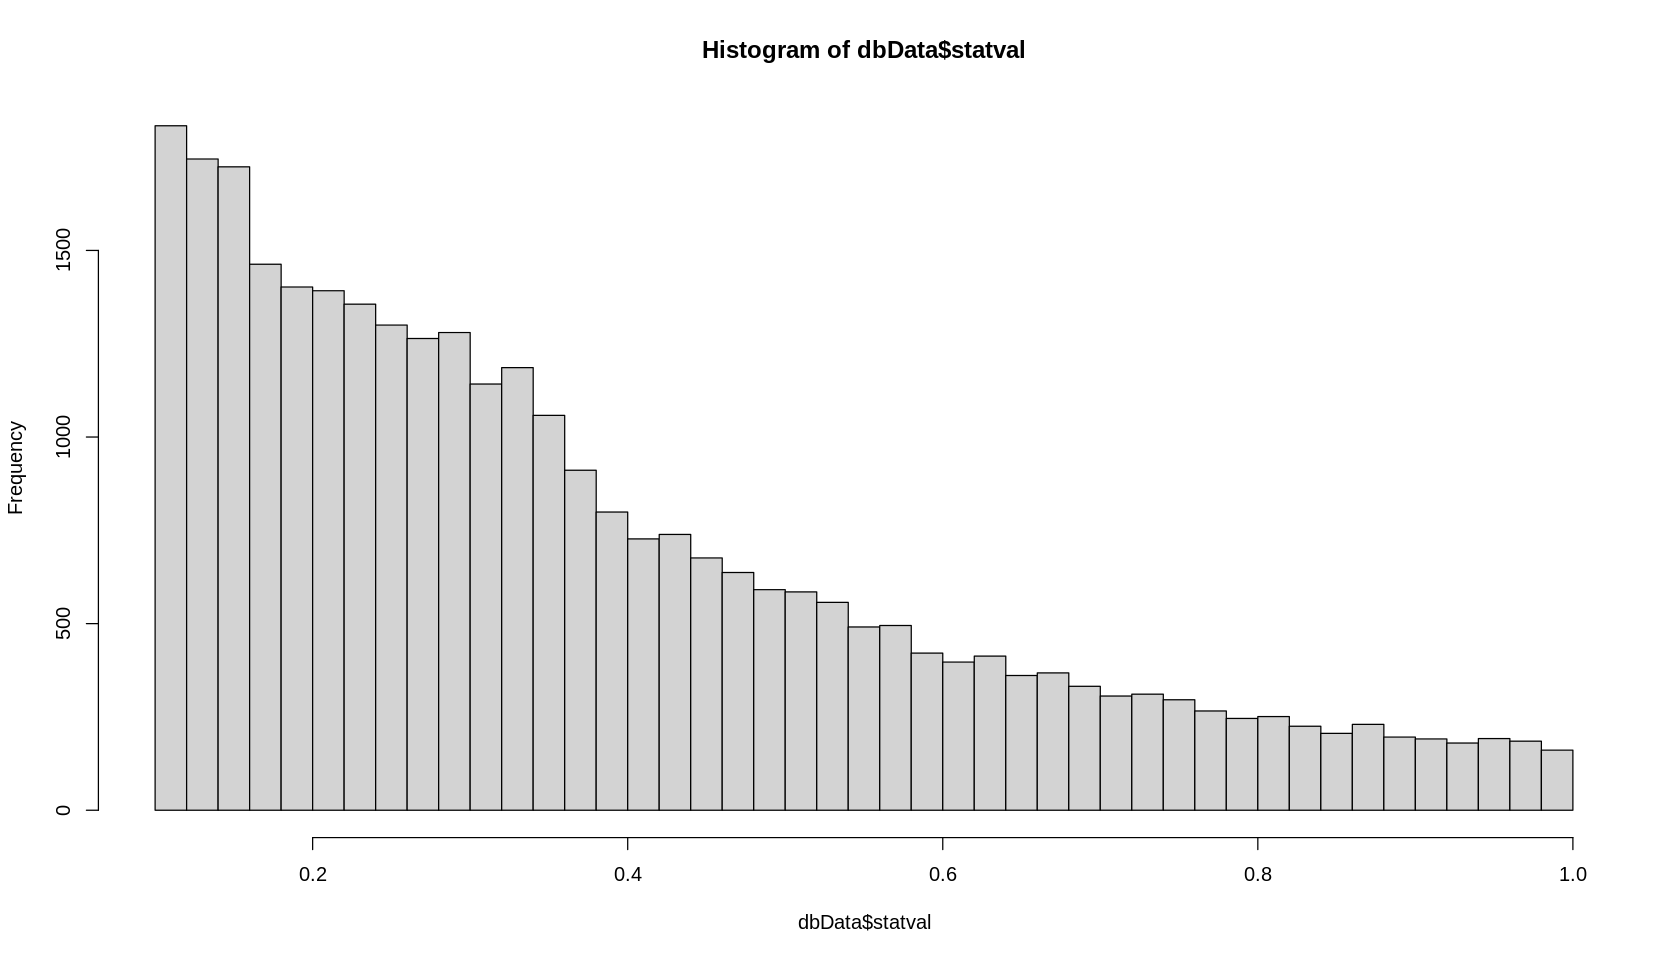

In [7]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleaned eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    Age > 90 and
    statname='cARdefault' and statval > 0.1 and statval <= 1"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1251       31088      0.1001      0.1945      0.3136      0.3729      0.5030      1.0000      0.2222 



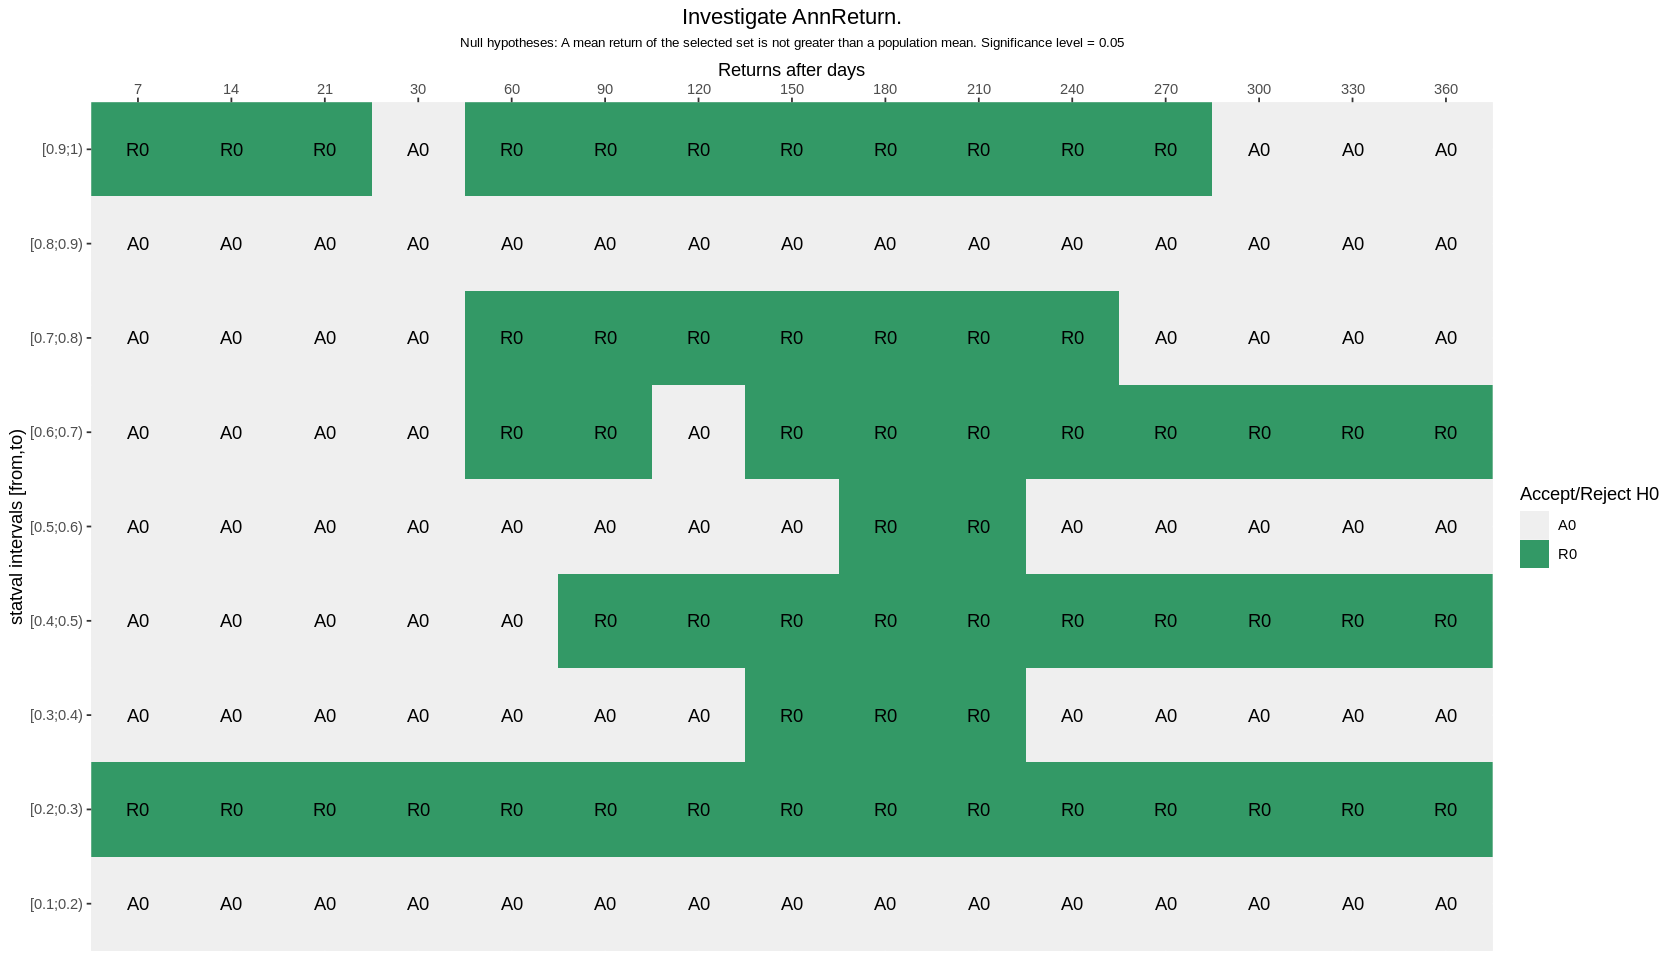


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,881,863,848,819,720,642,573,516,456,424,390,341,316,288,253
0.8 <= statval < 0.9,1078,1049,1027,999,891,791,716,643,586,544,484,429,374,321,288
0.7 <= statval < 0.8,1395,1366,1330,1292,1149,1015,938,858,781,708,628,565,494,423,381
0.6 <= statval < 0.7,1827,1789,1746,1684,1504,1387,1284,1158,1035,929,856,762,662,592,544
0.5 <= statval < 0.6,2483,2413,2356,2287,2036,1815,1587,1402,1231,1110,985,847,770,701,635
0.4 <= statval < 0.5,3287,3207,3116,3007,2663,2395,2163,1933,1732,1547,1392,1288,1205,1127,1049
0.3 <= statval < 0.4,4990,4885,4766,4639,4158,3756,3399,3098,2799,2567,2367,2154,1997,1874,1763
0.2 <= statval < 0.3,6427,6263,6121,5934,5278,4774,4307,3941,3589,3286,3007,2743,2509,2324,2154
0.1 <= statval < 0.2,7944,7717,7519,7287,6473,5837,5299,4796,4328,3969,3634,3295,3044,2805,2595




Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9 <= statval < 1,291,283,280,270,230,205,183,163,147,138,120,99,88,78,72
0.8 <= statval < 0.9,325,310,300,289,253,225,202,178,157,144,126,115,99,83,72
0.7 <= statval < 0.8,361,348,339,324,278,245,217,194,176,160,134,121,104,89,81
0.6 <= statval < 0.7,421,410,398,380,329,295,262,235,203,180,163,140,119,106,100
0.5 <= statval < 0.6,498,477,459,443,378,334,294,251,217,193,171,143,129,113,102
0.4 <= statval < 0.5,565,544,530,501,428,373,329,286,259,224,192,165,146,132,119
0.3 <= statval < 0.4,637,610,587,562,478,418,353,318,274,234,215,189,156,142,129
0.2 <= statval < 0.3,669,638,622,599,508,441,378,330,299,261,228,198,176,158,144
0.1 <= statval < 0.2,745,702,680,652,528,452,399,350,306,272,242,206,187,170,150


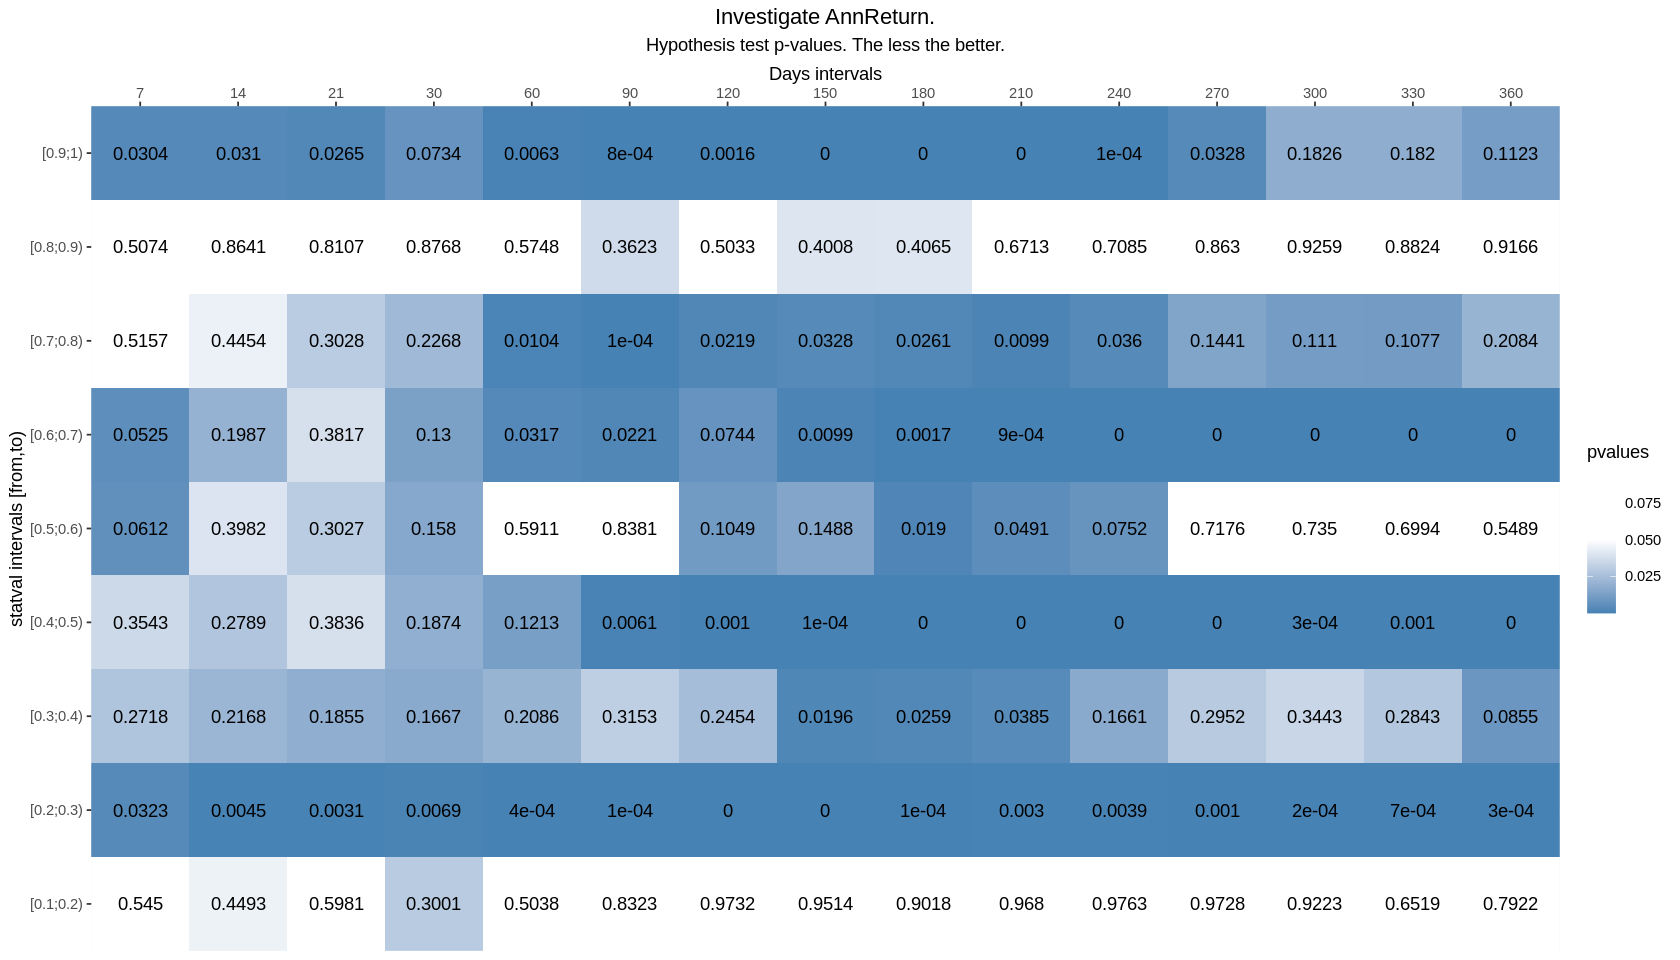

In [8]:
experiment = list(
  name = "Annualized Return Pcnt",
  description = "Investigate AnnReturn.",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0.1, to = 1, by = 0.1),
  comparisonOperator = `>`)

result = makeExperiment(experiment)
showObservationsCounts(experiment, result) 
showSystemsCounts(experiment, result) 